In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing dataset 

In [23]:
df = pd.read_csv("/home/vaibhavprakash/Prodigy/train.csv")

## Info about the dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking the first 5 rows of the dataset

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Removing the unnecessary columns

In [27]:
df.drop(columns=["Name","Cabin","Ticket"],inplace=True)

## Checking for na values

In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

## Handling the NA values

In [29]:
#Removing the rows in Embarked with NA value
df.dropna(subset=["Embarked"],inplace=True)

#Replacing the na values in Age with median value
df["Age"]= df["Age"].fillna(df["Age"].median())

In [30]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Checking the first 5 rows after changes

In [31]:
# Setting the PassengerId as the index
df.set_index("PassengerId",inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## 1. Categorical Data

## Countplot

Survived
0    549
1    340
Name: count, dtype: int64


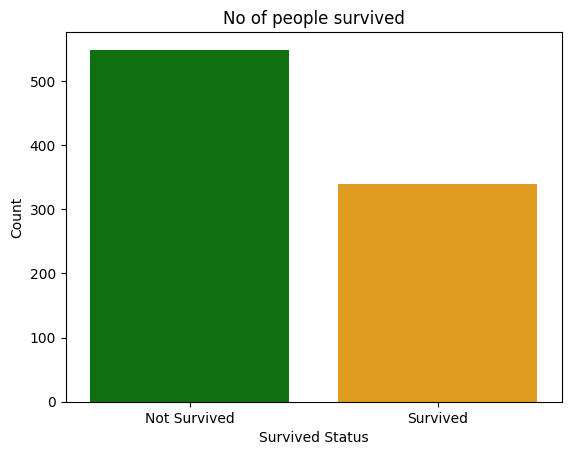

In [32]:
print(df["Survived"].value_counts())
sns.countplot(x="Survived",data=df,palette=["green","orange"],hue="Survived",legend=False)

plt.title("No of people survived")
plt.xlabel("Survived Status")
plt.ylabel("Count")
plt.xticks(ticks=[0,1],labels=["Not Survived","Survived"])
plt.show()

## Gender Distribution

Sex
male      577
female    312
Name: count, dtype: int64


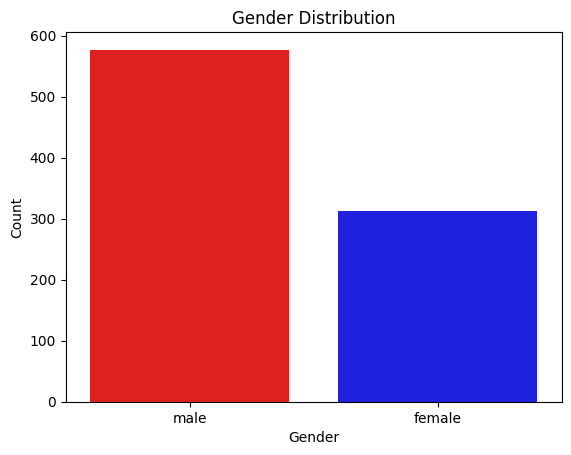

In [33]:
print(df["Sex"].value_counts())
sns.countplot(x="Sex",data=df,palette=["red","blue"],hue="Sex",legend=False)

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Survivors based on Sex


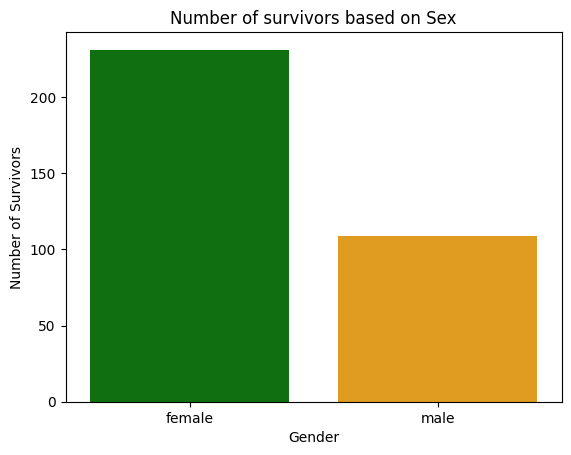

In [34]:
survived = df[df["Survived"]==1]
sns.countplot(x="Sex",data=survived,palette=["green","orange"],hue="Sex",legend=False)

plt.title("Number of survivors based on Sex")
plt.xlabel("Gender")
plt.ylabel("Number of Survivors")
plt.show()

## Survivors based on Pclass

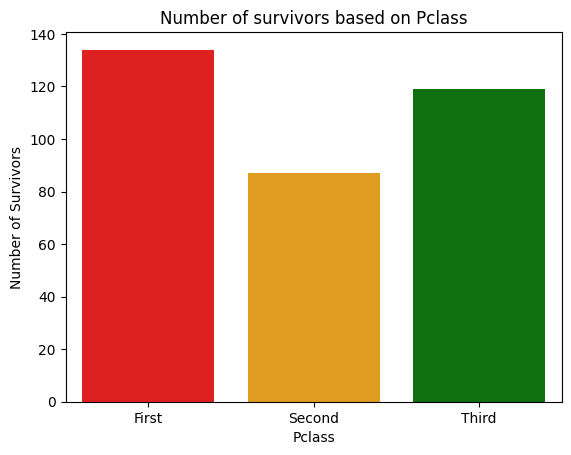

In [35]:
sns.countplot(x="Pclass", data=survived, palette=["red","orange","green"],hue="Pclass",legend=False)

plt.title("Number of survivors based on Pclass")
plt.xlabel("Pclass")
plt.ylabel("Number of Survivors")
plt.xticks(ticks=[0,1,2],labels=["First","Second","Third"])
plt.show()

## Survivors Based on Age

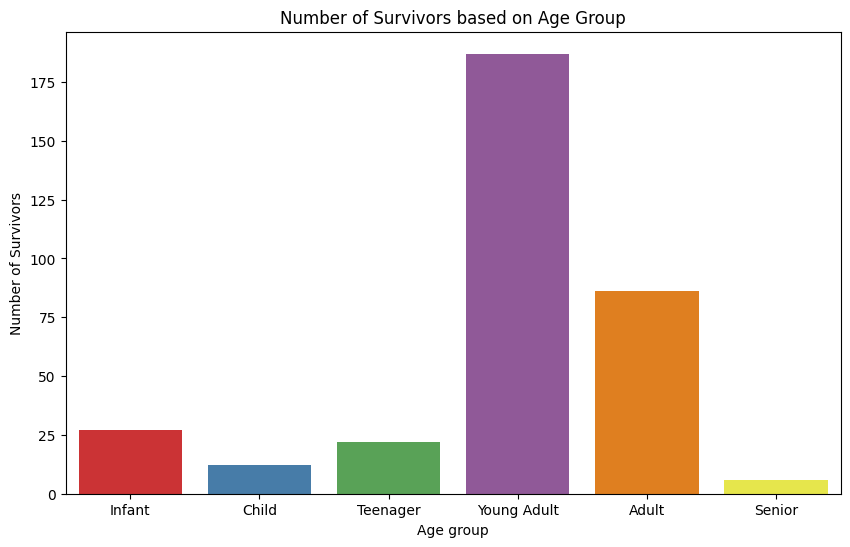

In [36]:
bin = [0,5,12,18,35,60,100]
label = ['Infant','Child','Teenager','Young Adult',"Adult","Senior"]

df["Age Group"] = pd.cut(df["Age"], bins=bin, labels=label,right=False)
survived = df[df["Survived"]==1]

plt.figure(figsize=(10,6))
sns.countplot(x="Age Group",data=survived,palette="Set1", hue="Age Group",legend=False)

plt.title("Number of Survivors based on Age Group")
plt.xlabel("Age group")
plt.ylabel("Number of Survivors")
plt.show()


## Rate of Survival based on Age group


/tmp/ipykernel_61586/3504194311.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_rate = df.groupby("Age Group")["Survived"].mean()
/tmp/ipykernel_61586/3504194311.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_rate.index,y=survived_rate.values,palette="Set1")


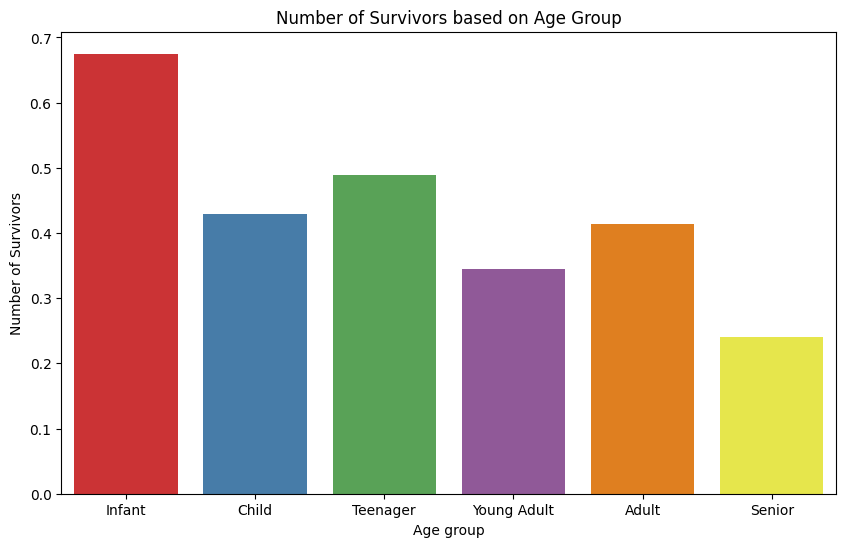

In [37]:
bin = [0,5,12,18,35,60,100]
label = ['Infant','Child','Teenager','Young Adult',"Adult","Senior"]

df["Age Group"] = pd.cut(df["Age"], bins=bin, labels=label,right=False)
survived_rate = df.groupby("Age Group")["Survived"].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=survived_rate.index,y=survived_rate.values,palette="Set1")

plt.title("Number of Survivors based on Age Group")
plt.xlabel("Age group")
plt.ylabel("Number of Survivors")
plt.show()

## PieChart

Text(0.5, 1.0, 'No of people survived')

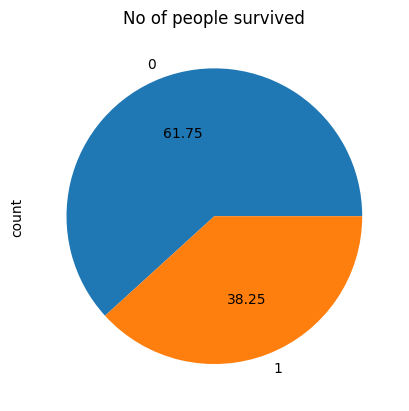

In [38]:
df["Survived"].value_counts().plot(kind="pie",autopct="%.2f")

plt.title("No of people survived")

## Pclass

<Axes: ylabel='count'>

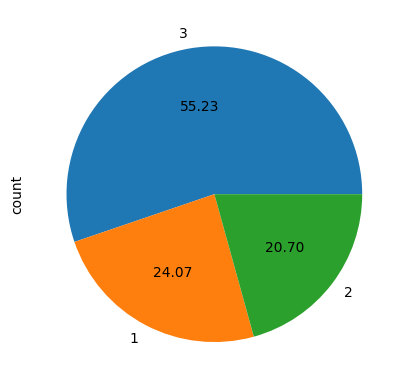

In [39]:
df["Pclass"].value_counts().plot(kind="pie",autopct="%.2f")

## 2. Numerical Data

## a. Histogram

(array([ 54.,  46., 177., 346., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

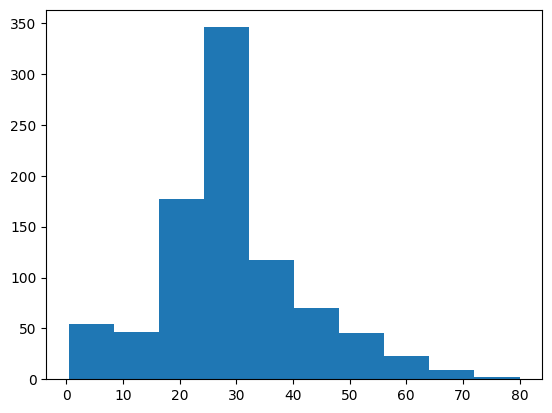

In [40]:
plt.hist(df["Age"])

## b. Distplot

/tmp/ipykernel_61586/1593632253.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


Text(0, 0.5, 'Density')

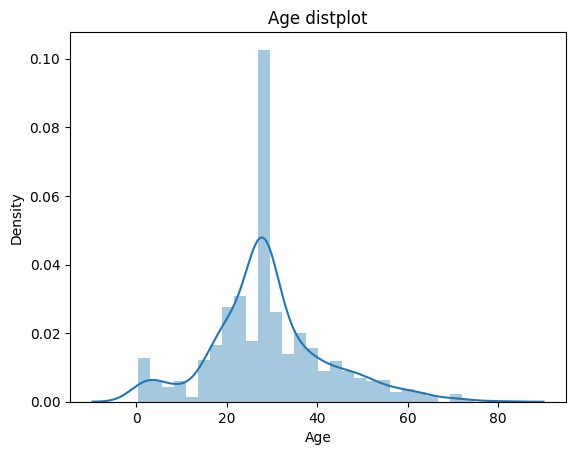

In [41]:
sns.distplot(df["Age"])

plt.title("Age distplot")
plt.xlabel("Age")
plt.ylabel("Density")

## c. Boxplot

<Axes: ylabel='Age'>

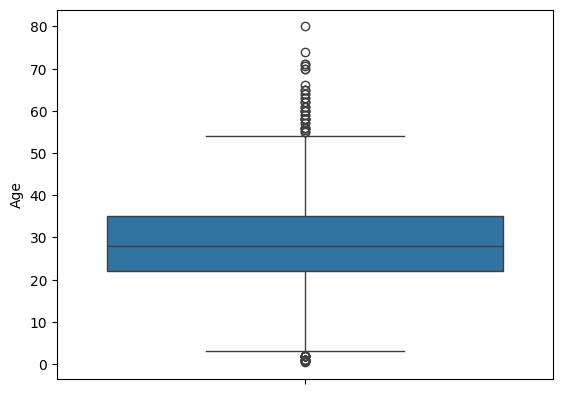

In [42]:
sns.boxplot(df["Age"])